#### Sales Analysis

In [2]:
import pandas as pd
import os

#### merging 12 months of sales data into a single file

In [4]:
files = [file for file in os.listdir(r"C:\Users\ASUS\Downloads\Pandas-Data-Science-Tasks-master\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data")]

all_months_data = pd.DataFrame()
98
for file in files:
    df = pd.read_csv(r"C:\Users\ASUS\Downloads\Pandas-Data-Science-Tasks-master\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data/"+ file)
    all_months_data = pd.concat([all_months_data,df])
    
all_months_data.to_csv("all_data.csv", index=False)
print(all_months_data)
    

      Order ID                     Product Quantity Ordered Price Each  \
0       176558        USB-C Charging Cable                2      11.95   
1          NaN                         NaN              NaN        NaN   
2       176559  Bose SoundSport Headphones                1      99.99   
3       176560                Google Phone                1        600   
4       176560            Wired Headphones                1      11.99   
...        ...                         ...              ...        ...   
11681   259353      AAA Batteries (4-pack)                3       2.99   
11682   259354                      iPhone                1        700   
11683   259355                      iPhone                1        700   
11684   259356      34in Ultrawide Monitor                1     379.99   
11685   259357        USB-C Charging Cable                1      11.95   

           Order Date                         Purchase Address  
0      04/19/19 08:46             917 1st St, 

# read in updated dataframe

In [6]:
all_data = pd.read_csv("all_data.csv")
all_data = all_data.drop(1)
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Drop rows of NAN

In [8]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
1571,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
all_data = all_data.dropna(how="all")

nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


#### Find "or" and delete it

In [11]:
temp_df=all_data[all_data['Order Date'].str[0:2]=='Or']
temp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [12]:
all_data = all_data[all_data['Order Date'].str[0:2] !='Or']

#### Convert columns to the correct type

In [14]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [15]:
type(all_data)


pandas.core.frame.DataFrame

In [16]:
import pandas as pd

all_data = pd.read_csv(
    fr"C:\Users\ASUS\Downloads\Pandas-Data-Science-Tasks-master\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data\{file}"
)


#### Augment data with addition columns

#### add month column

In [19]:
all_data["Month"] = pd.to_numeric(all_data["Order Date"].str[0:2], errors='coerce')


In [20]:
all_data["Month"] = pd.to_numeric(all_data["Order Date"].str[0:2], errors='coerce')
all_data = all_data.dropna(subset=["Month"])
all_data["Month"] = all_data["Month"].astype("int32")


In [21]:
# Convert to numeric (errors='coerce' will turn invalid strings into NaN)
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'], errors='coerce')
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'], errors='coerce')

# Now calculate Sales
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']


In [22]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9,15.36
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",9,23.90
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",9,11.95
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",9,149.99
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",9,11.95


#### Add a city column

In [24]:
def get_city(address):
    return address.split(',')[1]
all_data = all_data.dropna(subset=['Purchase Address'])
all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1].strip() if isinstance(x, str) and ',' in x else None
)


all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9,15.36,Los Angeles
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",9,23.90,Austin
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",9,11.95,Los Angeles
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",9,149.99,Seattle
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",9,11.95,Atlanta


#### what was the best month for sales? how much was earned thst month?

In [26]:
results = all_data.groupby('Month').sum()
print(results)

                                                Order ID  \
Month                                                      
9      2481512481522481532481542481552481562481572481...   
10     2486432501392501392502752506842512432521642522...   

                                                 Product  Quantity Ordered  \
Month                                                                        
9      AA Batteries (4-pack)USB-C Charging CableUSB-C...             13097   
10     Lightning Charging CableGoogle PhoneUSB-C Char...                22   

       Price Each                                         Order Date  \
Month                                                                  
9      2082895.35  09/17/19 14:4409/29/19 10:1909/16/19 17:4809/2...   
10        3347.33  10/01/19 01:3610/01/19 00:5310/01/19 00:5310/0...   

                                        Purchase Address       Sales  \
Month                                                                  
9      380 No

In [27]:
print(results)
print(len(results['Sales']))


                                                Order ID  \
Month                                                      
9      2481512481522481532481542481552481562481572481...   
10     2486432501392501392502752506842512432521642522...   

                                                 Product  Quantity Ordered  \
Month                                                                        
9      AA Batteries (4-pack)USB-C Charging CableUSB-C...             13097   
10     Lightning Charging CableGoogle PhoneUSB-C Char...                22   

       Price Each                                         Order Date  \
Month                                                                  
9      2082895.35  09/17/19 14:4409/29/19 10:1909/16/19 17:4809/2...   
10        3347.33  10/01/19 01:3610/01/19 00:5310/01/19 00:5310/0...   

                                        Purchase Address       Sales  \
Month                                                                  
9      380 No

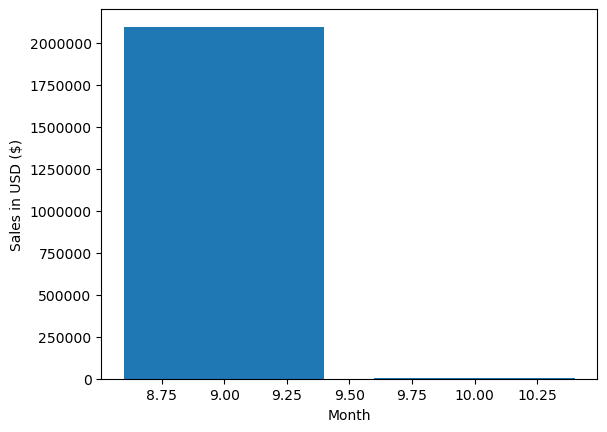

In [28]:
results = all_data.groupby('Month')['Sales'].sum()
results = results.sort_index()  # Make sure months are in order

import matplotlib.pyplot as plt

plt.bar(results.index, results.values)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Month')
plt.ylabel('Sales in USD ($)')
plt.savefig('Months Wise Sales ($).png')
plt.show()


#### what city had the highest number of sales.

In [30]:
print(all_data.columns)


Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'Sales', 'City'],
      dtype='object')


In [31]:
print(type(results))        # check object type
print(results.head())       # view first rows
print(results.index)        # index (like column names for Series)
print(results.values)       # actual values



<class 'pandas.core.series.Series'>
Month
9     2095463.39
10       3353.31
Name: Sales, dtype: float64
Index([9, 10], dtype='int32', name='Month')
[2095463.39    3353.31]


In [32]:
# Convert to numeric
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'], errors='coerce')
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'], errors='coerce')

# Now calculate Sales
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']


In [33]:
results = all_data.groupby('City').sum(numeric_only=True)
print(results.head())



             Quantity Ordered  Price Each  Month      Sales
City                                                       
Atlanta                  1035   169923.85   8235  171278.89
Austin                    766   105952.81   5997  106610.59
Boston                   1455   245551.73  11548  247368.73
Dallas                   1054   163079.02   8416  164215.85
Los Angeles              2125   352668.55  16960  354218.42


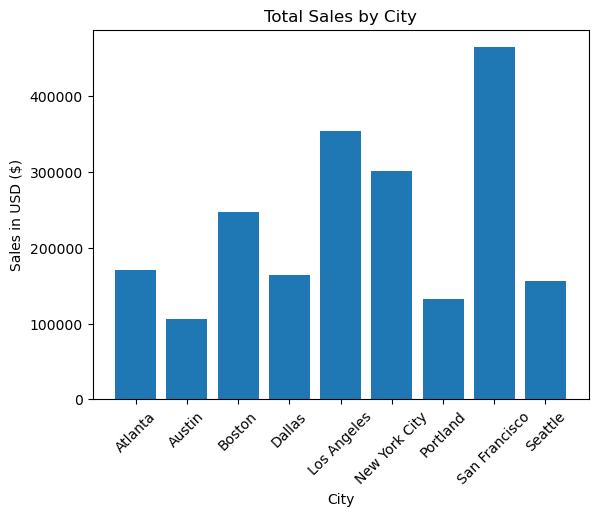

In [34]:
import matplotlib.pyplot as plt

plt.bar(results.index, results['Sales'])
plt.ticklabel_format(style='plain', axis='y')   # avoid scientific notation
plt.ylabel('Sales in USD ($)')
plt.xlabel('City')
plt.title('Total Sales by City')
plt.xticks(rotation=45)
plt.savefig('City Wise Total Sales($).png')
plt.show()


#### what time should we display advertisements to maximize likelihood of customers buying products

In [36]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9,15.36,Los Angeles
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",9,23.90,Austin
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",9,11.95,Los Angeles
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",9,149.99,Seattle
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",9,11.95,Atlanta


In [37]:
all_data['Order Date']= pd.to_datetime(all_data['Order Date'])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4064\1979206396.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Order Date']= pd.to_datetime(all_data['Order Date'])


In [38]:
all_data['Hour']=all_data['Order Date'].dt.hour
all_data['Minute']=all_data['Order Date'].dt.minute

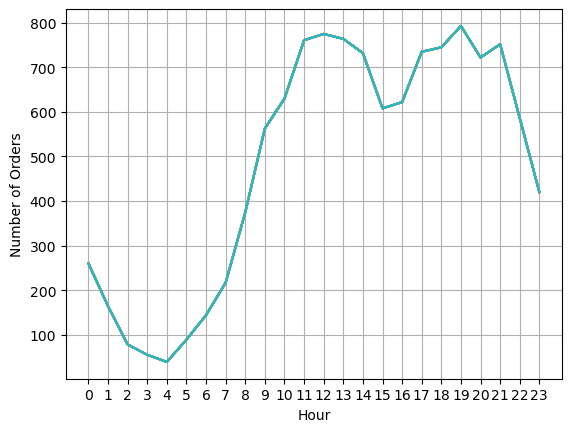

In [39]:
hours=[hour for hour , df in all_data.groupby('Hour')]
plt.plot(hours , all_data.groupby(['Hour']).count())
all_data.groupby(['Hour']).count()
plt.xticks(hours)
plt.grid()
plt.xlabel("Hour")
plt.ylabel("Number of Orders")
plt.savefig('Number of ordrs each hour.png')

plt.show()



#### What products are most often sold together?

In [41]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,15.36,Los Angeles,14,44
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9,23.90,Austin,10,19
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9,11.95,Los Angeles,17,48
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9,149.99,Seattle,7,52
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9,11.95,Atlanta,19,3


In [42]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]

# Fix: remove extra space + correct 'transform'
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df = df[['Order ID','Grouped']].drop_duplicates()
df.head()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_4064\3925349961.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
20,248171,"USB-C Charging Cable,USB-C Charging Cable"
60,248210,"iPhone,Lightning Charging Cable"
70,248219,"Bose SoundSport Headphones,Google Phone"
117,248265,"Vareebadd Phone,Bose SoundSport Headphones"
176,248323,"Google Phone,Bose SoundSport Headphones"


In [43]:
from itertools import combinations
from collections import Counter

count= Counter()
for row in df['Grouped']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list,2)))

for key , value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 61
('Google Phone', 'USB-C Charging Cable') 60
('iPhone', 'Wired Headphones') 27
('Vareebadd Phone', 'USB-C Charging Cable') 22
('iPhone', 'Apple Airpods Headphones') 18
('Google Phone', 'Wired Headphones') 17
('Google Phone', 'Bose SoundSport Headphones') 11
('Lightning Charging Cable', 'Wired Headphones') 8
('Vareebadd Phone', 'Wired Headphones') 6
('USB-C Charging Cable', 'Wired Headphones') 6


#### what products sold the most ? why do you think it sold the most?

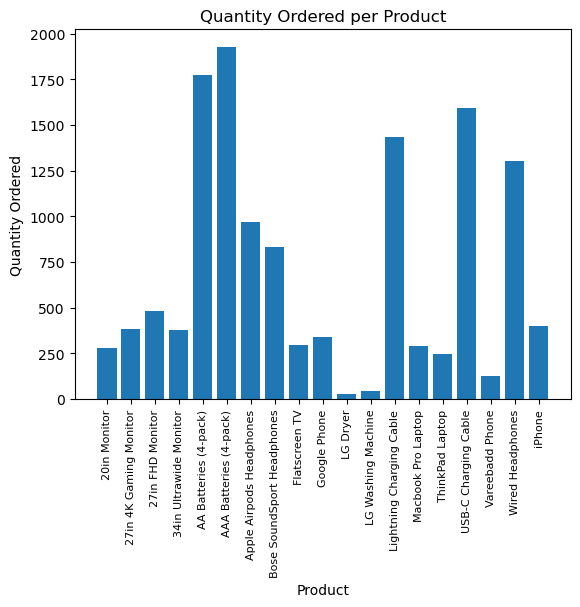

In [45]:

# Group by product
product_group = all_data.groupby('Product')

all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'], errors='coerce')
quantity_ordered = product_group['Quantity Ordered'].sum()

import matplotlib.pyplot as plt

products = [product for product, df in product_group]
plt.bar(products, quantity_ordered)
plt.xticks(products, rotation='vertical', size=8)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.title('Quantity Ordered per Product')
plt.savefig('Quantity of Products Ordered.png')
plt.show()


In [46]:
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'], errors='coerce')
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'], errors='coerce')


In [47]:
all_data = all_data.dropna(subset=['Price Each', 'Quantity Ordered'])


In [48]:
# Total sales
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

# Mean price per product
prices = all_data.groupby('Product')['Price Each'].mean()
print(prices)


Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_4064\1422382462.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(products,rotation='vertical',size=8)


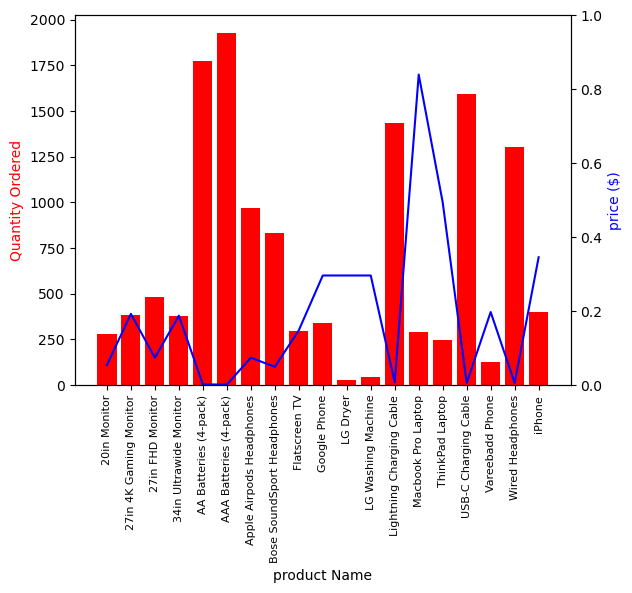

In [49]:
import matplotlib.pyplot as plt
fig,ax1=plt.subplots()

ax2=ax1.twinx()
ax1.bar(products,quantity_ordered, color= 'red')
ax1.plot(products , prices, "b-")
ax1.set_xlabel('product Name')
ax1.set_ylabel('Quantity Ordered', color='red')
ax2.set_ylabel('price ($)',color = 'blue')
ax1.set_xticklabels(products,rotation='vertical',size=8)
plt.savefig('Quantity of Products Ordered and thei price.png')

plt.show()